In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [4]:
df.shape

(1000, 40)

There are 1000 rows and 40 columns 

In [5]:
pd.options.display.max_columns = None

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
df['_c39'].isnull().sum()


1000

In [7]:
df.drop(columns=['_c39'],inplace=True)

In [12]:
for i in df.columns:
    if len(df[i].unique()) <= 20:
        print(i, df[i].unique())

policy_state ['OH' 'IN' 'IL']
policy_csl ['250/500' '100/300' '500/1000']
policy_deductable [1000 2000  500]
umbrella_limit [       0  5000000  6000000  4000000  3000000  8000000  7000000  9000000
 10000000 -1000000  2000000]
insured_sex ['MALE' 'FEMALE']
insured_education_level ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
insured_occupation ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
insured_hobbies ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
insured_relationship ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
incident_type ['Single Vehicle Collision' 'Vehicle Theft' '

In [13]:
for i in df.columns:
    if len(df[i].unique()) <= 20:
        print(i)

policy_state
policy_csl
policy_deductable
umbrella_limit
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
number_of_vehicles_involved
property_damage
bodily_injuries
witnesses
police_report_available
auto_make
fraud_reported


In [14]:
df['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

We can see that, one value in the umbrella limit is negative.. We will change it to positive.

In [15]:
for i in range(len(df['umbrella_limit'])):
    if df['umbrella_limit'][i] == -1000000:
        df['umbrella_limit'][i]  = 1000000

In [16]:
df['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000,  1000000,  2000000], dtype=int64)

the value has been changed

In [17]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

The data is not that much imbalanced.. we can proceed with this 75 - 25 ratio

In [18]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [20]:
len(df['policy_number'].unique())

1000

In [21]:
len(df['insured_zip'].unique())

995

Since, they are all unique for each row... we can remove these columns

In [22]:
df.drop(columns=['policy_number','insured_zip'],inplace=True)

In [25]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [26]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

In [27]:
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [28]:
df['po_mon'] = [i.month for i in df['policy_bind_date']]

In [30]:
df['po-year'] = [i.year for i in df['policy_bind_date']]

In [31]:
df[['po_mon','po-year']][0:5]

,po_mon,po-year
0,10,2014
1,6,2006
2,6,2000
3,5,1990
4,6,2014


In [32]:
df['in_mon'] = [i.month for i in df['incident_date']]
df['in-year'] = [i.year for i in df['incident_date']]

df[['in_mon','in-year']][0:5]

,in_mon,in-year
0,1,2015
1,1,2015
2,2,2015
3,10,2015
4,2,2015


In [33]:
df.drop(columns = ['policy_bind_date','incident_date'],inplace = True)

<Figure size 1080x360 with 0 Axes>

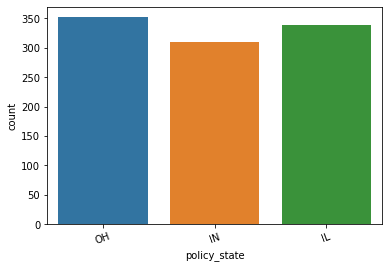

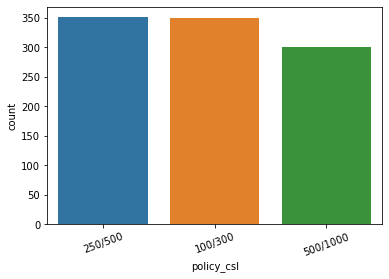

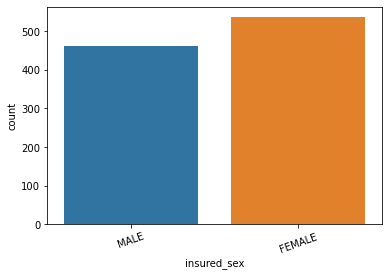

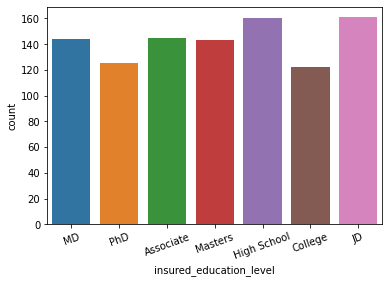

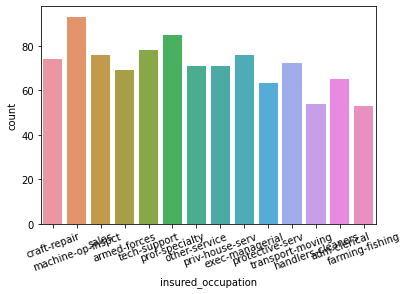

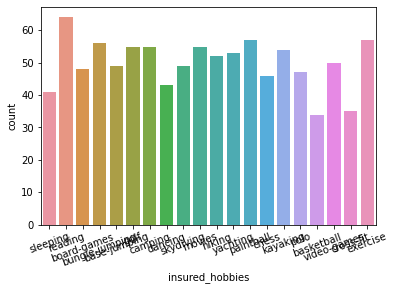

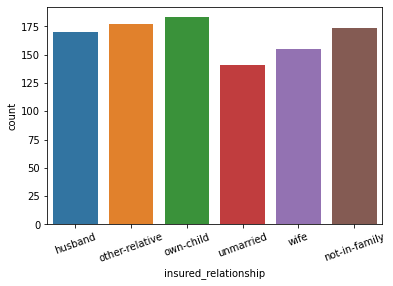

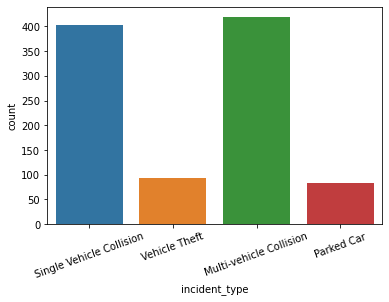

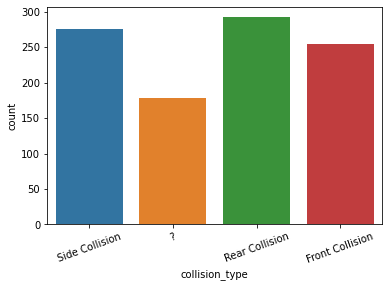

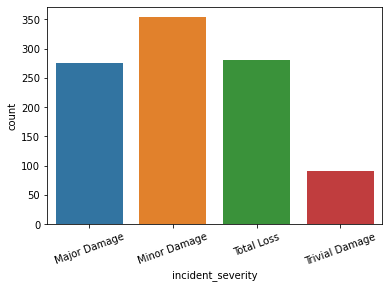

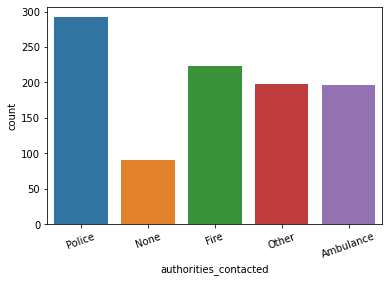

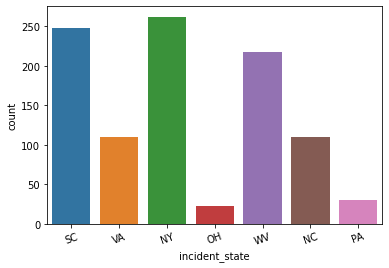

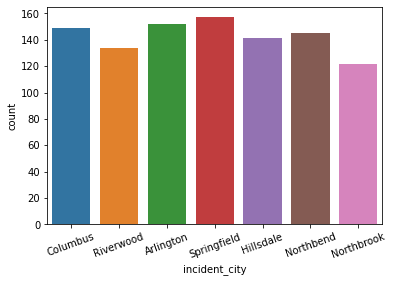

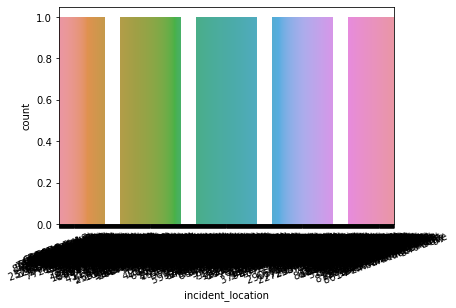

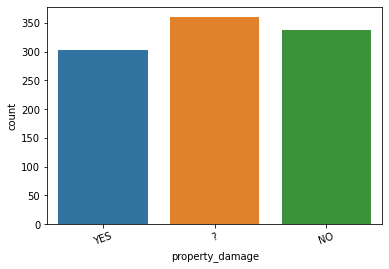

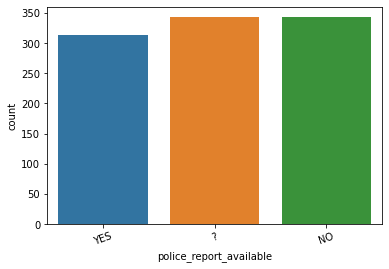

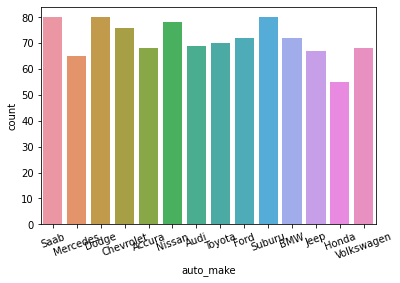

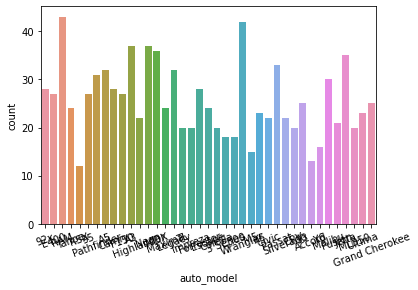

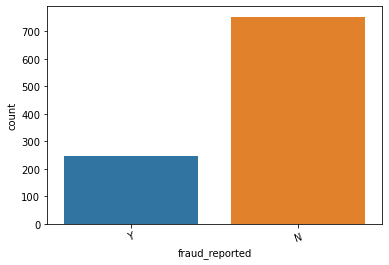

In [41]:
plt.figure(figsize = (15,5))
for i in col_o:
    plt.subplots(squeeze=False)
    sns.countplot(df[i])
    plt.xticks(rotation=20)

In [43]:
len(df['incident_location'].unique())

1000

There are 1000 incident location values which are unique, this column will not have much significant impact on model. We will remove it. 

In [45]:
df.drop(columns = ['incident_location'],inplace=True)

In [48]:
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0].astype('int64')
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1].astype('int64')

In [49]:
df.drop(columns = ['policy_csl'],inplace=True)

In [50]:
col_o = [col for col in df.columns if df[col].dtype == 'object']
col_o

col_n = [col for col in df.columns if df[col].dtype == 'int64' or df[col].dtype == 'float64']
col_n

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'po_mon',
 'po-year',
 'in_mon',
 'in-year',
 'csl_per_person',
 'csl_per_accident']

The numerical columns distribution.

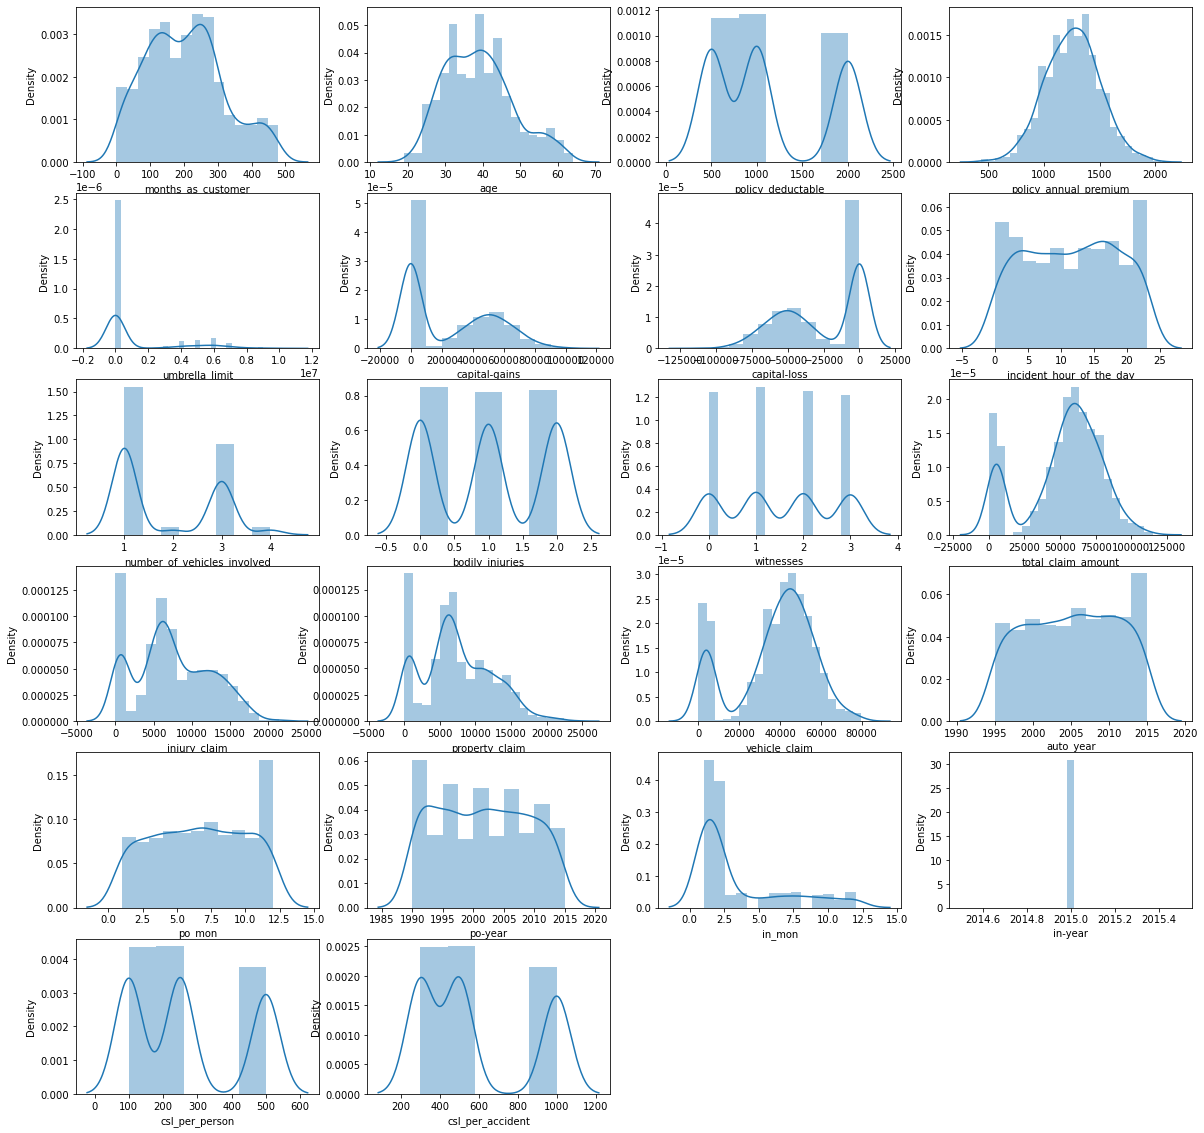

In [55]:
k=1
plt.figure(figsize = (20,20))
for i in col_n:
    plt.subplot(6,4,k)
    sns.distplot(df[i])
    k+=1

Only one columns looks like normally distributed.

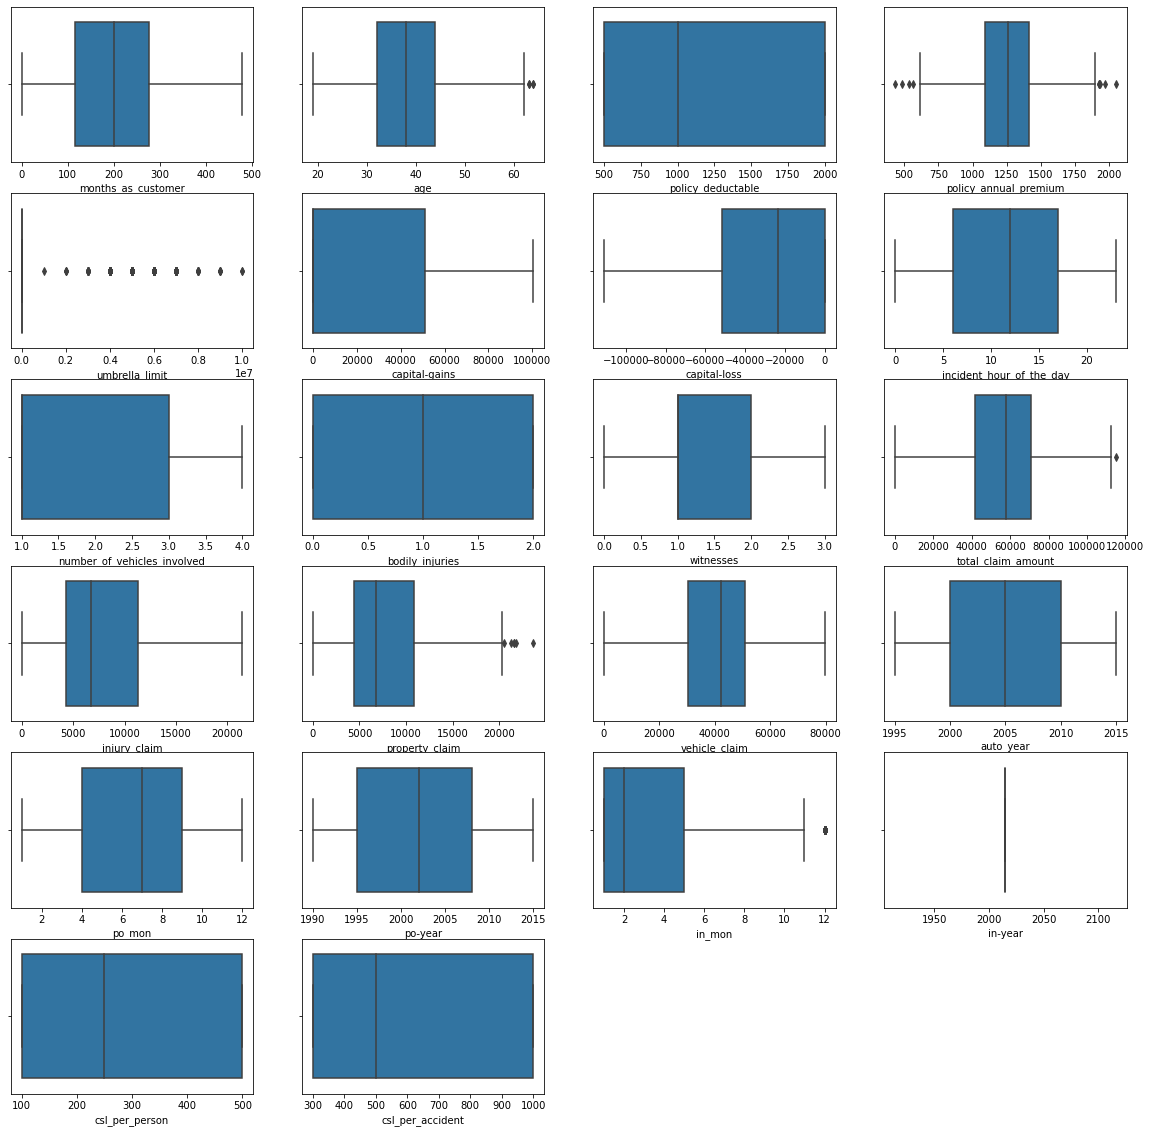

In [56]:
k=1
plt.figure(figsize = (20,20))
for i in col_n:
    plt.subplot(6,4,k)
    sns.boxplot(df[i])
    k+=1

Looks like the outliers are not very low in this data. Lets check for skewness

In [57]:

for i in col_n:
    print(i , df[i].skew())

months_as_customer 0.3621768477780205
age 0.47898804709224163
policy_deductable 0.4778872137362794
policy_annual_premium 0.004401994526610823
umbrella_limit 1.8071301923054035
capital-gains 0.4788502295807907
capital-loss -0.39147194299389343
incident_hour_of_the_day -0.03558446643823673
number_of_vehicles_involved 0.502664087487584
bodily_injuries 0.014777103511243209
witnesses 0.019636419856529662
total_claim_amount -0.594581988510234
injury_claim 0.26481087847181833
property_claim 0.3781687764308289
vehicle_claim -0.6210979312228687
auto_year -0.04828880711387396
po_mon -0.029320719279913556
po-year 0.052510955982057385
in_mon 1.375894229072849
in-year 0
csl_per_person 0.41001513153863506
csl_per_accident 0.6055865264722401


The skewness is also inside the acceptable limits of -0.5 to 0.5

Lets proceed with the data modelling

In [65]:
final_df = pd.get_dummies(df, columns = col_o[:-1])

In [66]:
final_df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,po_mon,po-year,in_mon,in-year,csl_per_person,csl_per_accident,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_?,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_?,property_damage_NO,property_damage_YES,police_report_available_?,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,2004,Y,10,2014,1,2015,250,500,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

final_df['fraud_reported'] = le.fit_transform(final_df['fraud_reported'])

In [68]:
X = final_df.drop(columns = ['fraud_reported'])
Y = final_df['fraud_reported']

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaledX = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [70]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(scaledX,Y,test_size=0.3,random_state = 11)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [75]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), KNeighborsClassifier()]

In [76]:
for mod in models:
    cla = mod
    cla.fit(xtrain,ytrain)
    pred = cla.predict(xtest)
    
    print(mod)
    print(accuracy_score(ytest,pred))
    print(confusion_matrix(ytest,pred))
    print(classification_report(ytest,pred))
    print('\n')

LogisticRegression()
0.79
[[184  34]
 [ 29  53]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       218
           1       0.61      0.65      0.63        82

    accuracy                           0.79       300
   macro avg       0.74      0.75      0.74       300
weighted avg       0.79      0.79      0.79       300



DecisionTreeClassifier()
0.7933333333333333
[[177  41]
 [ 21  61]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       218
           1       0.60      0.74      0.66        82

    accuracy                           0.79       300
   macro avg       0.75      0.78      0.76       300
weighted avg       0.81      0.79      0.80       300



RandomForestClassifier()
0.76
[[201  17]
 [ 55  27]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       218
           1       0.61      0.33      0.43        82

    accur

In [79]:
for mod in models:
    cla = mod
    cla.fit(xtrain,ytrain)
    predm = cla.predict(xtest)
    
    cvs = cross_val_score(cla,scaledX,Y,cv=5,scoring='f1').mean()
    
    print(mod)
    print(cvs - accuracy_score(ytest,predm))
    
    

LogisticRegression()
-0.1703453744651059
DecisionTreeClassifier()
-0.21905065130146406
RandomForestClassifier()
-0.29155844155844146
SVC()
-0.35970073873058944
KNeighborsClassifier()
-0.48730483862129437


Logistic Regression has the least difference when checked with cross_val_score

Lets finalize the LogisticRegression model and tune the hyper parameter

In [85]:
LogisticRegression()

penalty = ['l1', 'l2', 'elasticnet']
solver  = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    
parameters = dict(penalty = penalty , solver= solver)

In [86]:
gcv = GridSearchCV(LogisticRegression(),param_grid = parameters, cv=5)

In [87]:
gcv.fit(scaledX,Y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [89]:
gcv.best_score_

0.8230000000000001

In [90]:
gcv.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [97]:
mod = LogisticRegression(penalty = 'l1', solver = 'liblinear')
mod.fit(xtrain,ytrain)

LogisticRegression(penalty='l1', solver='liblinear')

Text(0.5, 1.0, 'Receiver operating characteristic')

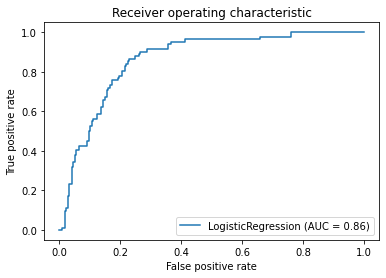

In [99]:
plot_roc_curve(mod,xtest,ytest)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')

The area under the curve is 0.86 which is pretty good.

# Conclusion

There were no missing values in the dataset. The continuos variables has no outliers and skewness is also under acceptable criteria though they werent normally distributed.

We have used dummies to address categorical variables in the data set.

After scaling the data, we have used 5 modelling techniques which are:-

1. Logistic regression
2. Decision Tree Classfier
3. Random Forest Classifier
4. Support Vector Classifer
5. K nearest neighbor classifier

After cross validating, the best model was logistic regression.

We have tuned the parameters for logistic regression and built the final model with best parameters found using grid search cv.

At the end we have plot roc curve to check he final accuracy. The AUC is 0.86 which is near to 1 and is considered to be good model.


In [100]:
import pickle
filename = 'insurance.pkl'
pickle.dump(mod,open(filename,'wb'))